In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import postlearn as pl
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [3]:
df = sns.load_dataset('titanic')

In [4]:
clf = RandomForestClassifier()
param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[2, 3, 5])
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

y = df['survived']
X = df.drop(['survived', 'who', 'alive'], axis=1)

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(value=X.median())
est.fit(X, y);

In [5]:
r = pl.ClassificationResults(est, X, y)

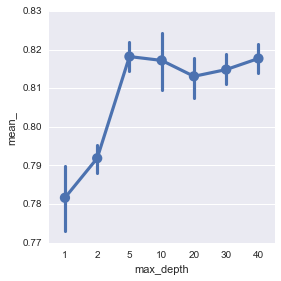

In [6]:
fig = r.plot_grid_scores('max_depth')

In [7]:
r.confusion_matrix()

predicted,0,1
actual,,
0,519,30
1,84,258


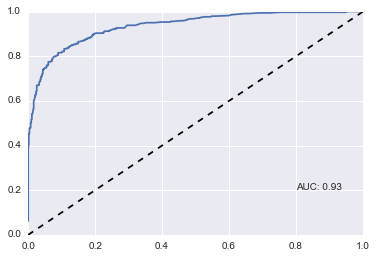

In [8]:
r.plot_roc_curve()

<module 'matplotlib.pyplot' from '/Users/tom.augspurger/Envs/fresh/lib/python3.5/site-packages/matplotlib/pyplot.py'>

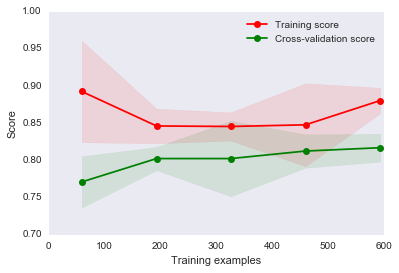

In [9]:
r.plot_learning_curve()